In [46]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import csv
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt


In [47]:
final_csv = pd.read_csv('final_csv.csv') 
final_csv.head()

C:\Users\sitra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
0,19790,249.0,0.0,NaN,0.0,2120.0,NaN,0.0,DL,NaN,...,1,NaN,DTW,11433,Detroit,MI,NaN,DL,NaN,2016
1,19790,92.0,0.0,NaN,0.0,2319.0,NaN,0.0,DL,NaN,...,1,NaN,ATL,10397,Atlanta,GA,NaN,DL,NaN,2016
2,19790,207.0,0.0,NaN,0.0,547.0,NaN,0.0,DL,NaN,...,1,NaN,LAX,12892,Los Angeles,CA,NaN,DL,NaN,2016
3,19790,173.0,0.0,NaN,0.0,2213.0,NaN,0.0,DL,NaN,...,1,NaN,SLC,14869,Salt Lake City,UT,NaN,DL,NaN,2016
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016


In [92]:
totflights_bydate = final_csv.groupby("FL_DATE",as_index=False)
totflights_bydate= totflights_bydate["FLIGHTS"].count()
totflights_bydate.head()

,FL_DATE,FLIGHTS
0,2016-01-01,13019
1,2016-01-02,14869
2,2016-01-03,15878
3,2016-01-04,15570
4,2016-01-05,14582


In [93]:
raw_x =totflights_bydate["FL_DATE"]
y = totflights_bydate["FLIGHTS"]


In [94]:
date_fmt = '%Y-%m-%d'


In [95]:
dt_x = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]


In [96]:
x = [mdates.date2num(i) for i in dt_x]


In [97]:
fig, ax = plt.subplots()


In [98]:
ax.plot_date(x, y, '-')


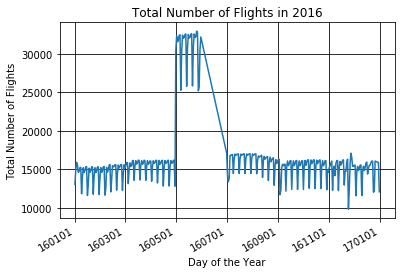

In [99]:
date_formatter = mdates.DateFormatter('%y%m%d')
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate()

plt.xlabel("Day of the Year")
plt.ylabel("Total Number of Flights")
plt.title("Total Number of Flights in 2016")
plt.grid(b=True, which='major', color='k', linestyle='-')

plt.show()